In [2]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df = pd.read_csv('C:\\Users\\Mubarik\\Desktop\\class_files\\marketing_customer_analysis.csv')

In [18]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [22]:
df.columns=[e.lower().replace(' ', '_') for e in df.columns]

In [23]:
df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

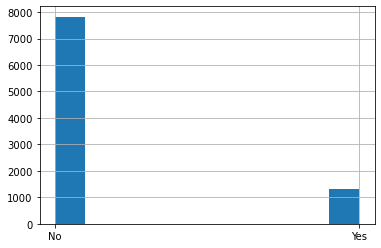

In [35]:
df['response'].hist()
plt.show()

In [44]:
trimmed = df.filter(items=['response', 'sales_channel', 'total_claim_amount', 'income'])
trimmed

,response,sales_channel,total_claim_amount,income
0,No,Agent,384.811147,56274
1,No,Agent,1131.464935,0
2,No,Agent,566.472247,48767
3,No,Call Center,529.881344,0
4,No,Agent,138.130879,43836
5,Yes,Web,159.383042,62902
6,Yes,Agent,321.600000,55350
7,No,Agent,363.029680,0
8,Yes,Agent,511.200000,14072
9,No,Branch,425.527834,28812


In [45]:

channelxresponse = trimmed.groupby(['sales_channel']).count().sort_values(['response'], ascending=True).reset_index()
channelxresponse.head()

,sales_channel,response,total_claim_amount,income
0,Web,1325,1325,1325
1,Call Center,1765,1765,1765
2,Branch,2567,2567,2567
3,Agent,3477,3477,3477


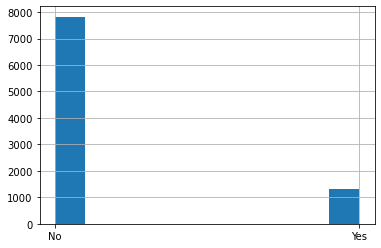

In [58]:
df['response'].hist()
plt.show()

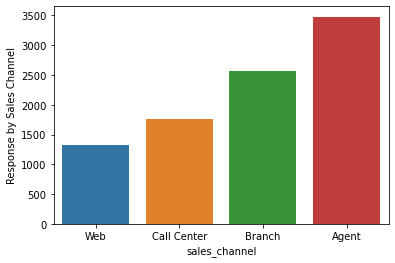

In [67]:

sns.barplot(x='sales_channel', y='response', data=channelxresponse)
plt.ylabel('Response by Sales Channel')
plt.show()


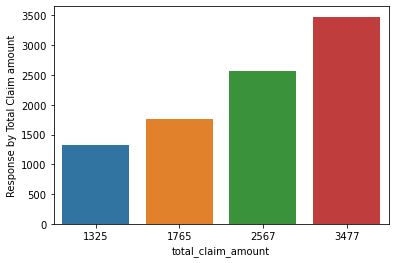

In [68]:
sns.barplot(x='total_claim_amount', y='response', data=channelxresponse)
plt.ylabel('Response by Total Claim amount')
plt.show()

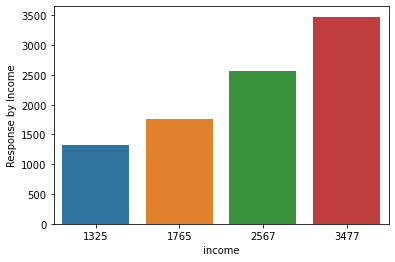

In [77]:
sns.barplot(x='income', y='response', data=channelxresponse)
plt.ylabel('Response by Income')
plt.show()